# Computer Vision Thresholding

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

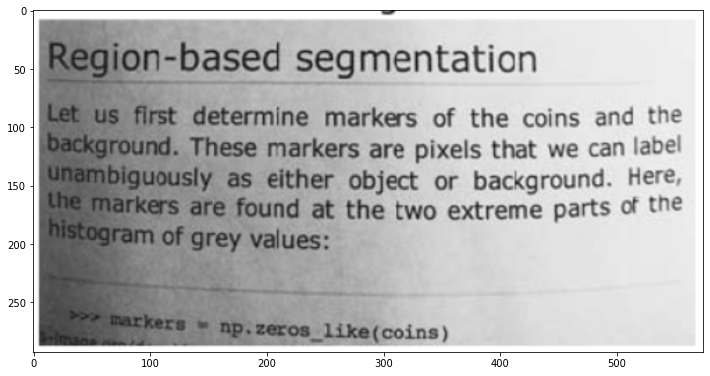

In [22]:
# Have a look at the 2 images below
text = cv2.imread('img/t1.png')
plt.figure(figsize = (12,10))
plt.imshow(text, cmap='gray')


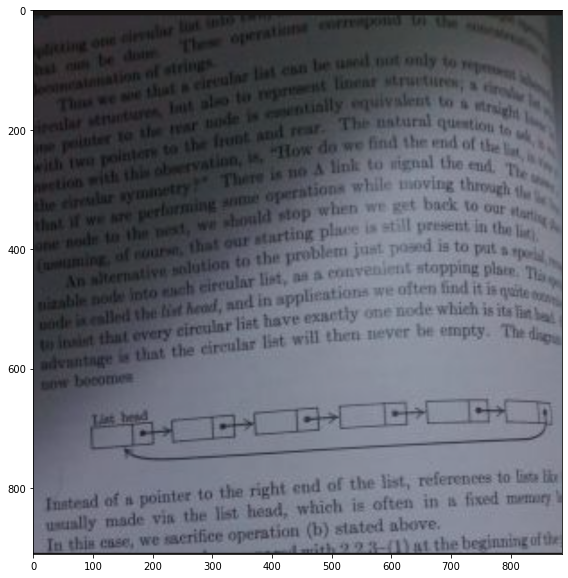

In [23]:
text_2 = cv2.imread('img/t2.png')
plt.figure(figsize = (12,10))
plt.imshow(text_2, cmap='gray')


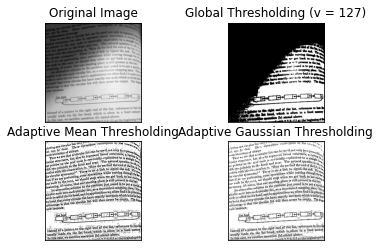

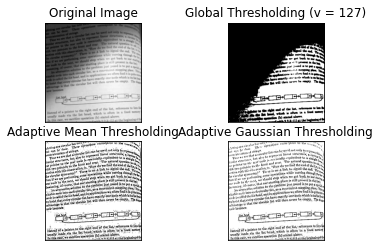

In [3]:
# Apply threshold to the images above to make them look better, try to find the best one
# Apply threshold to the images above to make them look better, try to find the best one

def threshold_maker(image, blur=0):
    img = cv2.imread(image, 0)
    
    if blur==0:
        img = cv2.GaussianBlur(img, (5,5), 0 )
    elif blur==1:
        img = cv2.medianBlur(img,5)
    
    ret,th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY, 11, 2)
    
    th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY, 11, 2)
    
    
    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    
    images = [img, th1, th2, th3]
    for i in range(4):
        #plt.figure(figsize = (12,10))
        plt.subplot(2, 2, i+1), plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    
threshold_maker('img/t2.png', blur=0 ) # 0 for gaussian
threshold_maker('img/t2.png', blur=1 ) # 1 for median


In [ ]:
# Try to apply adaptiveThreshold and see if that helps, use both ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C


Text(0.5, 1.0, 'Otsus thresholding')

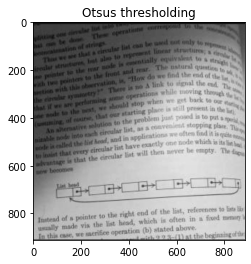

In [4]:
# Now apply Otsu's thresholding to the same images, always make sure to start with a copy of the original image
img = cv2.imread('img/t2.png', 0)
ret4,th4 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#plt.figure(figsize = (12,10))
plt.subplot(1, 1, 1), plt.imshow(img,'gray')
plt.title('Otsus thresholding')
#plt.xticks([]), plt.yticks([])

Text(0.5, 1.0, 'Otsus thresholding after gaussian blur')

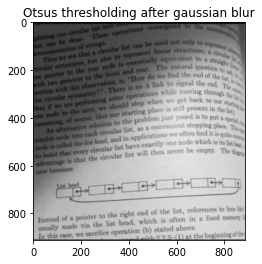

In [5]:
# Now try to first apply Gaussian Blur to the image and then Otsu thresholding
# Now try to first apply Gaussian Blur to the image and then Otsu thresholding
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img, (5,5), 0)
ret5,th5 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#plt.figure(figsize = (12,10))
plt.subplot(1, 1, 1), plt.imshow(img,'gray')
plt.title('Otsus thresholding after gaussian blur')
#plt.xticks([]), plt.yticks([])


In [ ]:
# In yesterday's notebook there was a similar challenge, with a image of a note which was very dark on the left side
# If you didn't manage to get it clean yesterday, try to go back to it now and apply what you just did here.
# Did it get better?
